

# Project: Investigate a Dataset - [TMDB -Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

### Dataset Description 
The dataset I have chosen consists of the movies from 1960 to 2015, with their budget, revenue, and also the year of release, and some extra column with the ID of the movie, some other columns had more than one value, I only took the first one to process in my analysis.

I have removed some of the column which I won't use in my analysis e.g (ID, IMDB ID, Homepage, etc..)


### Question(s) for Analysis
<ol>
    <li><strong><a href="#Q1"> Which movie genre has the highest occurence, and which genre has the highest revenue? And does the highest occurence have the highest revenue? </a></strong></li>
    <li><strong><a href="#Q2">Does the budget affects on the revenue and the popularity? </a></strong></li>
    <li><strong><a href="#Q3">What is the growth in the number of movies? Did the highest revenue genre change over the years?</a> </strong></li>  
    <li><strong><a href="#Q4">Does the movie genre affects its popularity and the average vote? And does the popularity or the average vote affect the revenue? </a></strong></li> 
    <li><strong><a href="#Q5">Does the movie runtime affects its revenue?  </a></strong></li>   
    <li><strong><a href="#Q6">The number of movies released per month, and what is the best time to release a movie? </a></strong></li>   
</ol>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Loading the csv data and getting to know the columns and the number of rows I am dealing with in this dataset and the type of data if anything needs to be changed

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


### Data Cleaning
After exploring the dataset, I found there are some columns which I won't be using and some other columns with more that one value which will afferct my analysis, so I decided to remove the columns that I won't be using during my analysis, and regarding the columns with more than one value, I will be the using the first one only.
 

In [6]:
df.drop(['id', 'imdb_id', 'homepage', 'overview', 'tagline', 'budget_adj', 'revenue_adj', 'keywords', 'director', 'production_companies'], axis = 1, inplace = True)

Here, I'm checking that the columns are removed successfully.

In [7]:
df.head()

,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


I will be changing a lot of column to get the first element only so I decided to code it in a function to be re-usable

In [8]:
def getFirstOnly(string):
    df[string] = df[string].str.split("|", expand = True)[0]

In [9]:
getFirstOnly('cast')

In [10]:
getFirstOnly('genres')

In [11]:
df.head()

,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,124,Action,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,120,Action,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley,119,Adventure,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,136,Action,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel,137,Action,4/1/15,2947,7.3,2015


I will be changing a lot of column names so I decided to code it in a function to be re-usable

In [12]:
def renameColumn(old_name, new_name):
    df.rename(columns = {old_name : new_name}, inplace = True)

In [13]:
renameColumn('cast', 'actor')

In [14]:
renameColumn('genres', 'genre')

In [15]:
df.head()

,popularity,budget,revenue,original_title,actor,runtime,genre,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,124,Action,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,120,Action,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley,119,Adventure,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,136,Action,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel,137,Action,4/1/15,2947,7.3,2015


As we can see, the release_date is not in the date form, so it needs a fix

In [16]:
df.release_date = pd.to_datetime(df.release_date)

In [17]:
df.head()

,popularity,budget,revenue,original_title,actor,runtime,genre,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,124,Action,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,120,Action,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley,119,Adventure,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,136,Action,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel,137,Action,2015-04-01,2947,7.3,2015


Checking for NaN values

In [18]:
df.isnull().any()

popularity        False
budget            False
revenue           False
original_title    False
actor              True
runtime           False
genre              True
release_date      False
vote_count        False
vote_average      False
release_year      False
dtype: bool

In [19]:
#dropping all NaN values
df.dropna(inplace = True)

In [20]:
df.isnull().any()

popularity        False
budget            False
revenue           False
original_title    False
actor             False
runtime           False
genre             False
release_date      False
vote_count        False
vote_average      False
release_year      False
dtype: bool

I have noticed that there are some movies with 0 runtime, which is wrong data, so I decided to remove all the rows with runtime = 0

In [21]:
df.query('runtime == 0').head()

,popularity,budget,revenue,original_title,actor,runtime,genre,release_date,vote_count,vote_average,release_year
92,1.876037,0,0,Mythica: The Necromancer,Melanie Stone,0,Fantasy,2015-12-19,11,5.4,2015
334,0.357654,0,0,Ronaldo,Cristiano Ronaldo,0,Documentary,2015-11-09,80,6.5,2015
410,0.097514,0,0,Anarchy Parlor,Robert LaSardo,0,Horror,2015-01-01,15,5.6,2015
445,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind,0,Horror,2015-10-09,52,5.0,2015
486,0.176744,0,0,If There Be Thorns,Heather Graham,0,TV Movie,2015-04-05,11,5.4,2015


In [22]:
#removing all rows with runtime = 0
df.drop(df[df['runtime'] == 0].index, inplace = True)

In [23]:
df.query('runtime == 0').count()

popularity        0
budget            0
revenue           0
original_title    0
actor             0
runtime           0
genre             0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

Checking for duplicates

In [24]:
sum(df.duplicated())

1

Found only 1 duplicate row, removed it

In [25]:
df.drop_duplicates(inplace = True)

In [26]:
sum(df.duplicated())

0

In [27]:
#extracting the release month, to facilate the process later on
df['release_month'] = df.release_date.dt.month

Now, we have cleaned our data and is ready to proccess in our analysis

In [28]:
df.head()

,popularity,budget,revenue,original_title,actor,runtime,genre,release_date,vote_count,vote_average,release_year,release_month
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,124,Action,2015-06-09,5562,6.5,2015,6
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,120,Action,2015-05-13,6185,7.1,2015,5
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley,119,Adventure,2015-03-18,2480,6.3,2015,3
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,136,Action,2015-12-15,5292,7.5,2015,12
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel,137,Action,2015-04-01,2947,7.3,2015,4


<a id='eda'></a>
## Exploratory Data Analysis

<a id='Q1'></a>
### Question 1: Which movie genre has the highest occurence, and which genre has the highest revenue? And                                    does the highest occurence have the highest revenue?
                      

In [29]:
#grouping by the genre to analyze it
df_genre = df.groupby('genre').size()
df_genre

genre
Action             1588
Adventure           585
Animation           379
Comedy             2313
Crime               380
Documentary         390
Drama              2444
Family              142
Fantasy             270
Foreign               8
History              44
Horror              910
Music                99
Mystery             125
Romance             182
Science Fiction     213
TV Movie             76
Thriller            489
War                  58
Western              42
dtype: int64

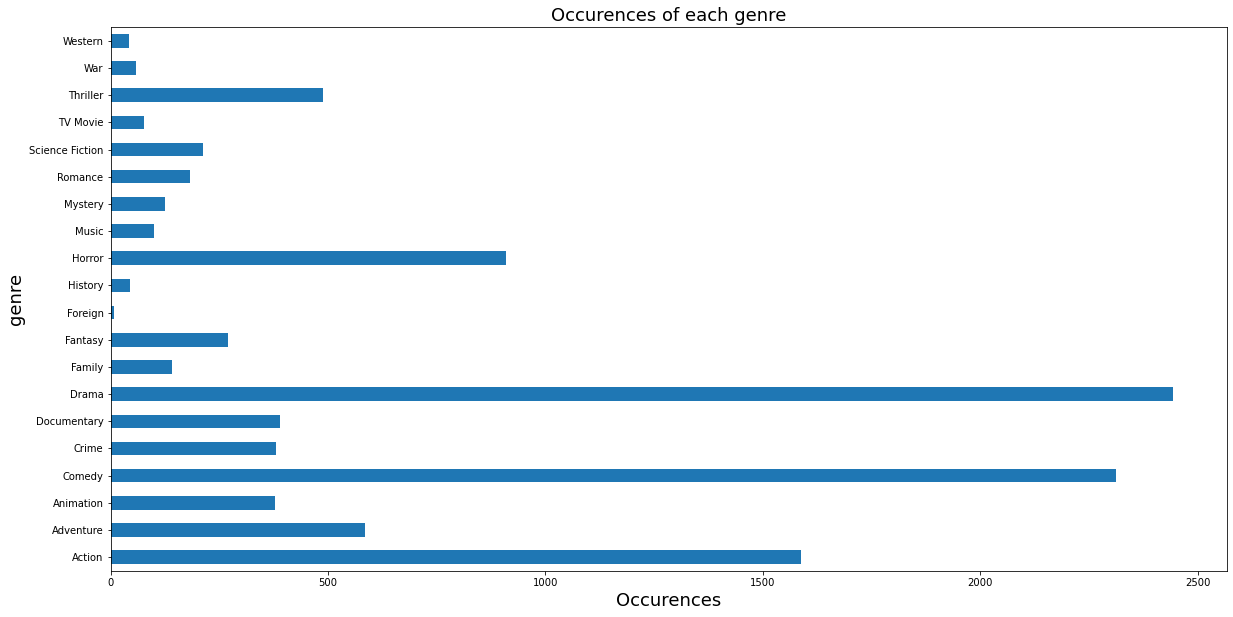

In [30]:
plt.xlabel('Occurences', fontsize = 18)
plt.ylabel('Genre', fontsize = 18)
plt.title('Occurences of each genre', fontsize = 18)
df_genre.plot.barh(figsize = (20, 10));

As we can see, the highest occurence of movies are: Drama, Comedy, Action

Now let's see if the highest occurence has the highest revenue

In [31]:
df_revenue = df.groupby('genre')['revenue'].sum().sort_values(ascending = False)
df_revenue

genre
Action             96606072845
Adventure          73107006764
Comedy             67952461496
Drama              61678301024
Animation          28797048213
Fantasy            18303948327
Science Fiction    17046401611
Horror             15432626119
Thriller           13003269735
Crime              12705800478
Family              8854452778
Romance             7046888501
Mystery             3019881629
War                 2708551908
Music               2304615926
History             1951867180
Western             1305819749
Documentary          816699424
TV Movie              42000000
Foreign                      0
Name: revenue, dtype: int64

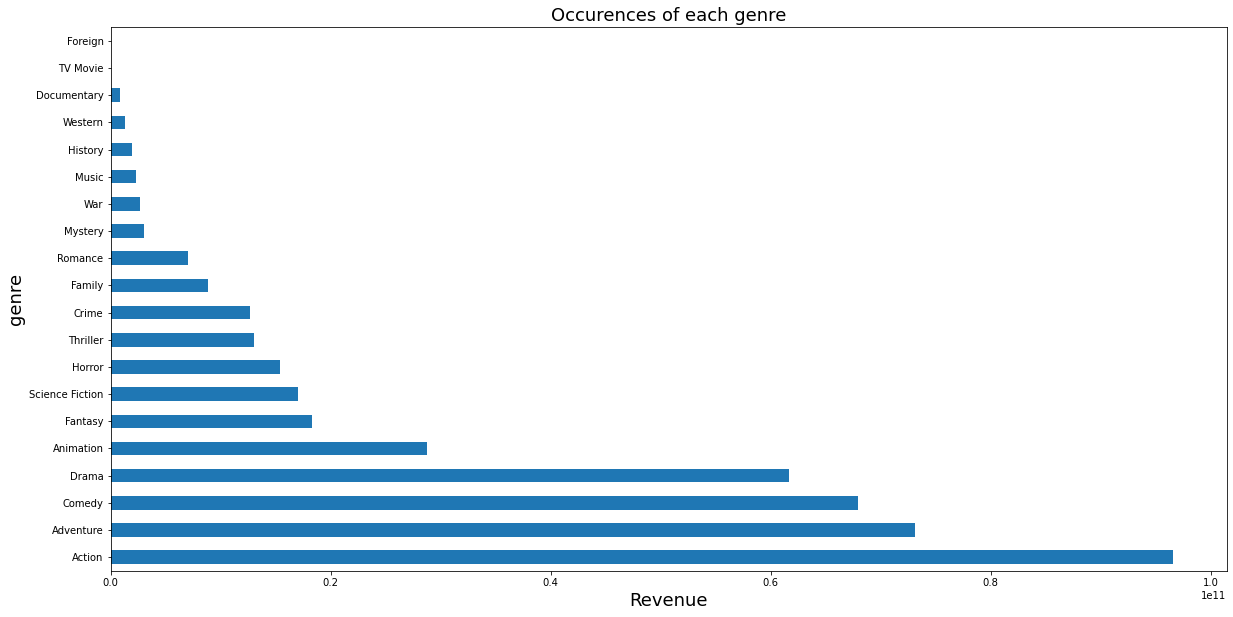

In [32]:
plt.xlabel('Revenue', fontsize = 18)
plt.ylabel('genre', fontsize = 18)
plt.title('Occurences of each genre', fontsize = 18)
df_revenue.plot.barh(figsize = (20, 10));

The highest revenue genre is: Action, Adventure and Comedy

We can conlcude that the highest occurence doesn't mean the highest revenue

<a id='Q2'></a>
### Question 2: Does the budget affects on the revenue and the popularity?

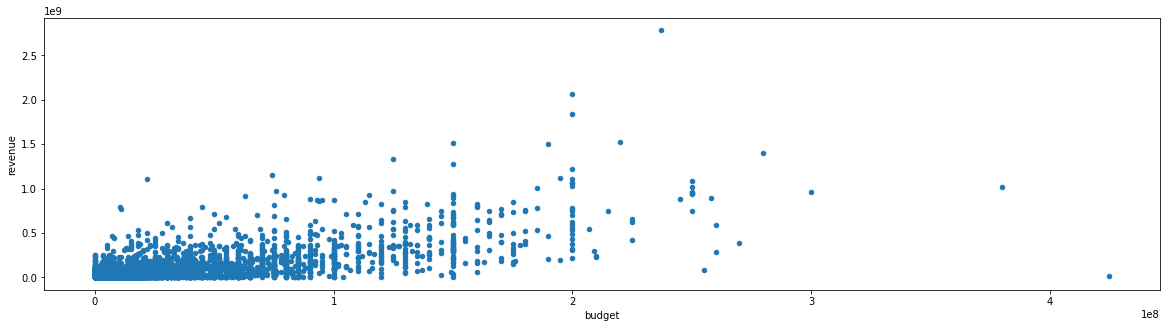

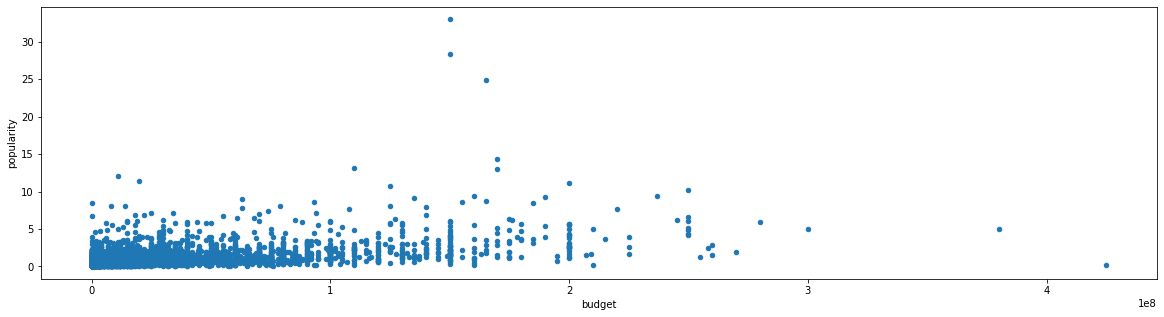

In [33]:
df.plot(x = 'budget', y = 'revenue', kind = 'scatter', figsize = (20, 5));
df.plot(x = 'budget', y = 'popularity', kind = 'scatter', figsize = (20, 5));

-As we can see from the first scatter plot, there is a very weak correlation between the budget and the revenue. 

The budget affects the revenue but weakly.

-As we can see from the second scatter plot, there is no correlation between the budget and the popularity.

The budget doesn't affect the popularity.

<a id='Q3'></a>
### Question 3: What is the growth in the number of movies? Did the highest revenue genre change over the years?

In [34]:
df.release_year.min()

1960

In [35]:
df.release_year.max()

2015

In this dataset, the oldest movie was produced in 1960, and the newest one was in 2015

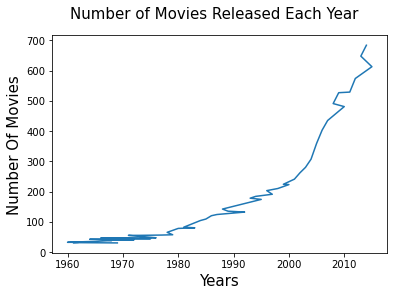

In [36]:
movie_count = df['release_year'].value_counts()
fig = plt.figure();
plt.plot(movie_count);
fig.suptitle('Number of Movies Released Each Year', fontsize = 15);
plt.xlabel('Years',fontsize = 15 );
plt.ylabel('Number Of Movies', fontsize = 15);

I decided to cut the timeline by 2, one before 2000 and the other is after 2000

In [37]:
df_before_2000 = df.query('release_year < 2000')
before_2000_size = df_before_2000.size

In [38]:
df_after_2000 = df.query('release_year >= 2000')
after_2000_size = df_after_2000.size

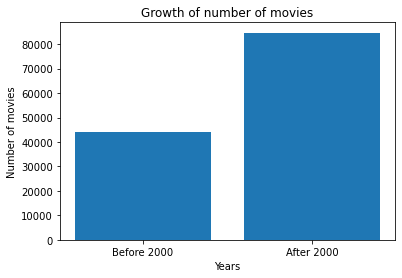

In [39]:
heights = [before_2000_size, after_2000_size]
labels=['Before 2000','After 2000']
plt.bar([1, 2], heights, tick_label = labels);
plt.title('Growth of number of movies')
plt.xlabel('Years');
plt.ylabel('Number of movies');

As we can see from the 2 previous graphs, the growth is exponential.

In [40]:
df_before_2000 = df_before_2000.groupby('genre').size()
df_before_2000

genre
Action             652
Adventure          247
Animation           69
Comedy             846
Crime              151
Documentary         43
Drama              795
Family              42
Fantasy            131
Foreign              3
History             13
Horror             305
Music               33
Mystery             44
Romance             52
Science Fiction     78
TV Movie            21
Thriller           108
War                 20
Western             27
dtype: int64

In [41]:
df_after_2000 = df_after_2000.groupby('genre').size()
df_after_2000

genre
Action              936
Adventure           338
Animation           310
Comedy             1467
Crime               229
Documentary         347
Drama              1649
Family              100
Fantasy             139
Foreign               5
History              31
Horror              605
Music                66
Mystery              81
Romance             130
Science Fiction     135
TV Movie             55
Thriller            381
War                  38
Western              15
dtype: int64

Did the highest revenue genre change over the years? In order to answer this question, let's plot the highest revenue movies over the years

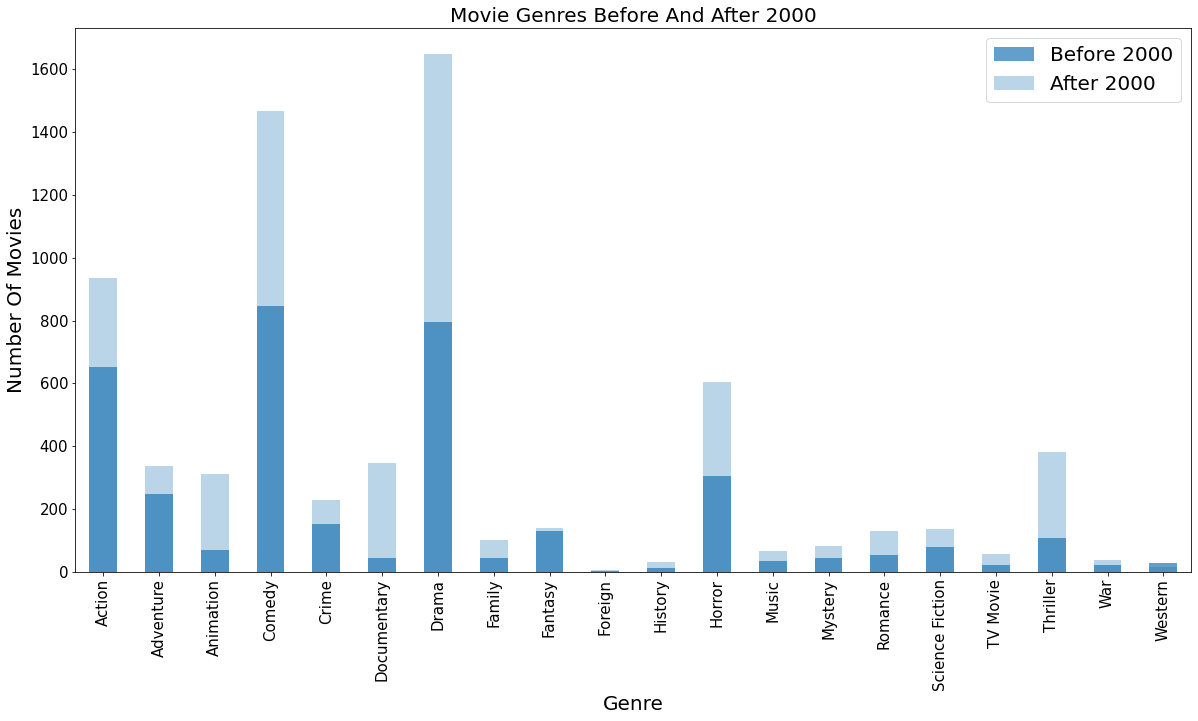

In [42]:
df_before_2000.plot(kind = 'bar', alpha = 0.7, label = 'Before 2000', fontsize = 15, figsize = (20, 10))
df_after_2000.plot(kind = 'bar', alpha = 0.3, label = 'After 2000', fontsize = 15)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Number Of Movies', fontsize = 20)
plt.title('Movie Genres Before And After 2000', fontsize = 20);
plt.legend(fontsize = 20);

Yes! The highest revenue genre changed! Before 2000, it was the Comedy followed by the Drama and the Action, after 2000 it's the Drama followed by the Comedy and the Action

<a id='Q4'></a>
### Question 4: Does the movie genre affects its popularity and the average vote? And does the popularity or the average vote affect the revenue?

In [43]:
df_genre_1 = df.groupby('genre', as_index = False)['popularity'].mean()
df_genre_1.head()

,genre,popularity
0,Action,0.837402
1,Adventure,1.219834
2,Animation,0.846050
3,Comedy,0.538225
4,Crime,0.694063


In [44]:
df_genre_2 = df.groupby('genre', as_index = False)['vote_average'].mean()
df_genre.head()

genre
Action       1588
Adventure     585
Animation     379
Comedy       2313
Crime         380
dtype: int64

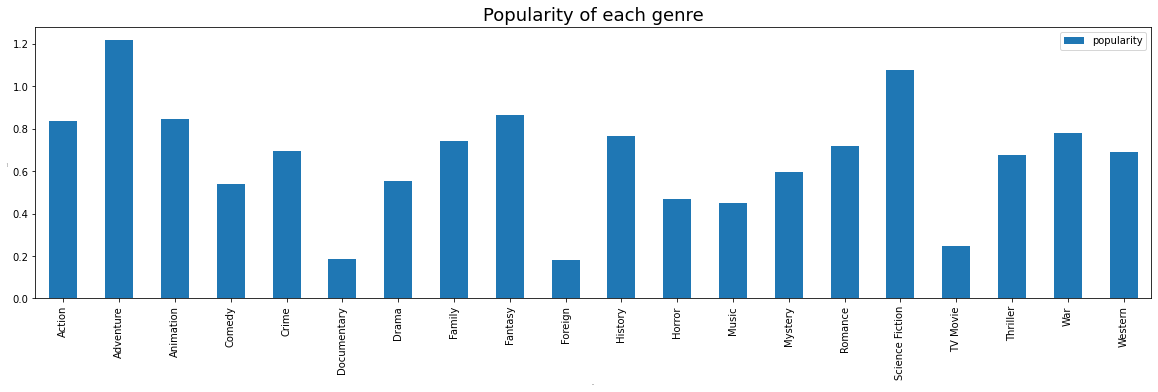

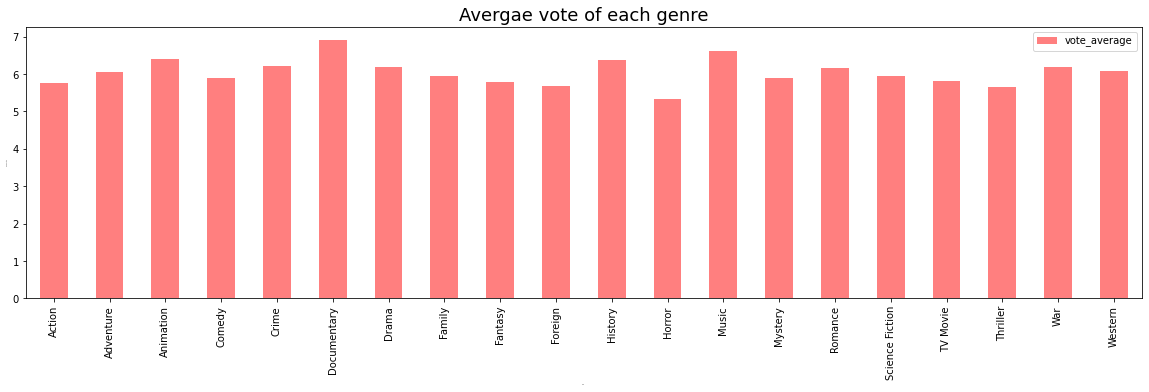

In [45]:
df_genre_1.plot(x = 'genre', y = 'popularity', kind = 'bar', figsize = (20, 5));
plt.xlabel('Genre', fontsize = 0);
plt.ylabel('Popularity', fontsize = 0);
plt.title('Popularity of each genre', fontsize = 18);

df_genre_2.plot(x = 'genre', y = 'vote_average', kind = 'bar', figsize = (20, 5), color = 'red', alpha = 0.5);
plt.xlabel('Genre', fontsize = 0);
plt.ylabel('Average Vote', fontsize = 0);
plt.title('Avergae vote of each genre', fontsize = 18);

As we can see from the previous two bar charts, the highest popularity is assosicated with the Adventure genre, and the highest average vote is assosiated with the Documentary genre

Now let's check if the popularity or the average vote affect the revenue

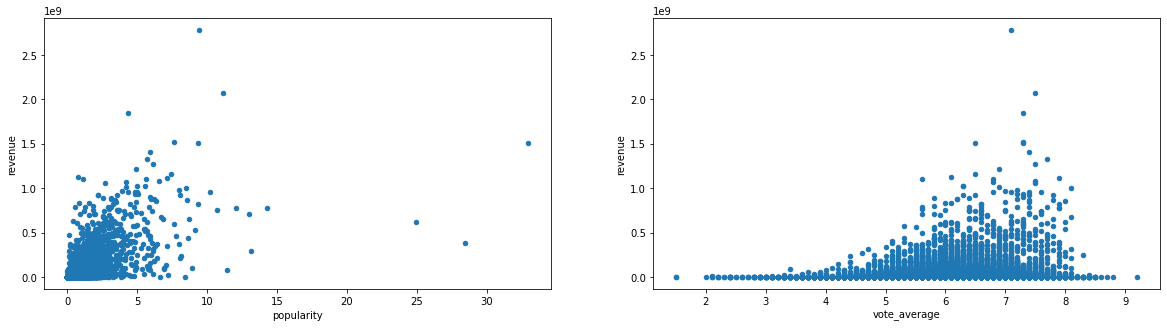

In [46]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (20, 5)) 
df.plot(x = 'popularity', y = 'revenue', kind = 'scatter', ax = ax1)
df.plot(x = 'vote_average', y = 'revenue', kind = 'scatter', ax = ax2);

No, there is no correlation at all between the popularity and the revenue or the average vote and the revenue

<a id='Q5'></a>
### Question 5: Does the movie runtime affects its revenue? 

In [47]:
df_runtime = df.groupby('runtime', as_index = False)['revenue']

I have decided to group the movies runtime in 3 categories, Short (Less than an hour), Medium (From 1 to 2 hours), Long (From 2 to 3 Hours)

In [48]:
short_length=  df.query('runtime <= 60')
med_length =  df.query('runtime <= 120 and runtime > 60')
long_length = df.query('runtime >= 180 and runtime > 120')

In [49]:
#calculating the mean of each category
mean_revenue_short = short_length['revenue'].mean()
mean_revenue_med = med_length['revenue'].mean()
mean_revenue_long = long_length['revenue'].mean()

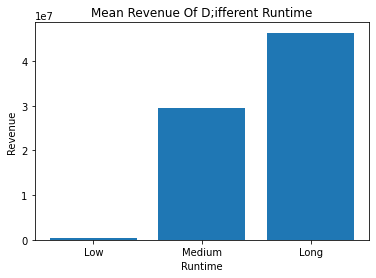

In [50]:
heights = [mean_revenue_short, mean_revenue_med, mean_revenue_long]
labels=['Low','Medium','Long']
plt.bar([1, 2, 3], heights, tick_label = labels);
plt.title('Mean Revenue Of D;ifferent Runtime')
plt.xlabel('Runtime');
plt.ylabel('Revenue');

As we can tell from the previous bar chart, the highest revenue is always associated with the long movies

<a id='Q6'></a>
### Question 6: The number of movies released per month, and what is the best time to release a movie?

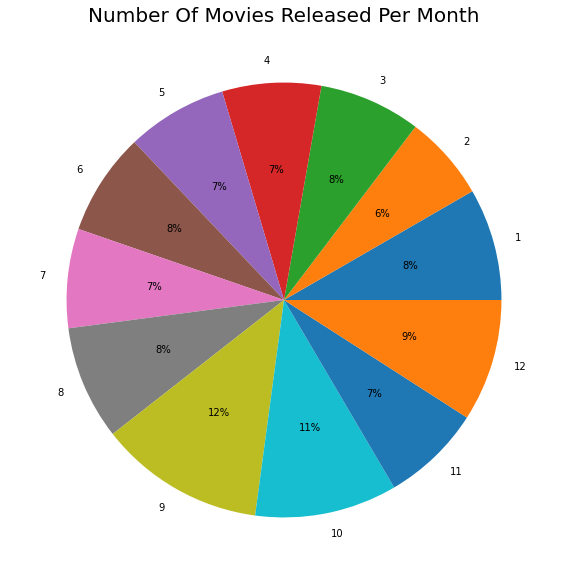

In [51]:
df.groupby('release_month').size().plot(kind = 'pie', autopct='%1.0f%%', figsize = (10, 10), legend = False);
plt.ylabel(' ', fontsize = 0)
plt.title('Number Of Movies Released Per Month', fontsize = 20);

As we can see the month of 9 folllowed by the month of 10 are the highest in the number of releases

Now, let's see if the highest number of releases means the highest revenue

I decided to cut the year in quadrants

In [52]:
first_quad = df.query('release_month <= 3')
second_quad = df.query('release_month <= 6 and release_month > 3')
third_quad = df.query('release_month <= 9 and release_month > 6')
fourth_quad = df.query('release_month <= 12 and release_month > 9')

I will be getting the mean 4 times, so I coded it into a function to be re-usable

In [53]:
def getMeanRevenue(df):
    return df['revenue'].mean()

In [54]:
first_quad_mean_revenue = getMeanRevenue(first_quad)
second_quad_mean_revenue = getMeanRevenue(second_quad)
third_quad_mean_revenue = getMeanRevenue(third_quad)
fourth_mean_revenue = getMeanRevenue(fourth_quad)

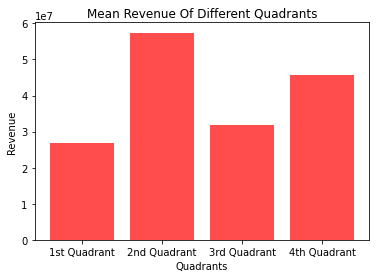

In [55]:
heights = [first_quad_mean_revenue, second_quad_mean_revenue, third_quad_mean_revenue, fourth_mean_revenue]
labels=['1st Quadrant','2nd Quadrant','3rd Quadrant', '4th Quadrant']
plt.bar([1, 2, 3, 4], heights, tick_label = labels, color = 'red', alpha = 0.7);
plt.title('Mean Revenue Of Different Quadrants');
plt.xlabel('Quadrants');
plt.ylabel('Revenue');

The 2nd quadrant is the highest in revenue

<a id='conclusions'></a>
## Conclusions

<ul>
    <li>The highest occurence doesn't mean the highest revenue</li>
    <li>The budget affects the revenue but weakly. And it doesn't affect the popularity.</li>
    <li>The highest revenue genres are drama, comedy and action </li>
    <li>There is no correlation between the popularity and the revenue or the average vote and the revenue</li>
    <li>The highest revenue is always associated with the long movies(2 to 3 hours)</li>
    <li>The month of 9 folllowed by the month of 10 are the highest in the number of releases</li>
    <li>The second year quadrant is the highest in revenue</li>
</ul>

<p> <strong>To get the highest revenue, the movie genre must be Drama, Comedy or Action, The movie runtime should be from 2 to 3 hours, and the movie must be released in the second quadrant of the year </strong> </p>

### Limitations
<ul>
    <li>The dataset isn't clear, I remove some of the columns because I didn't understand what they were</li>
    <li>There were a lot of NaN values</li>
    <li>There were a lot of 0 values </li>
    <li>Some columns had more than one value</li>
    <li>The data cleaning was time taking</li>
</ul>
